In [1]:
cd ../marathon/

/Users/timothychan/marathon/marathon-repo/marathon


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import marathonlib
%matplotlib inline

In [3]:
def plot_model_deviation(model, X_train, y_train, X_test, y_test):
    print 'Train R^2:', model.score(X_train, y_train)
    print 'Test R^2:', model.score(X_test, y_test)
    y_predict = model.predict(X_test)
    print 'Standard Error of Test:', marathonlib.time_to_timestring(np.var(y_test-y_predict)**0.5)
    plt.hist(y_test-y_predict, bins=70, normed=True, linewidth=0)
    plt.xlim(-100, 250)
    plt.ylim(0, 0.04)
    plt.vlines(0, 0, 1)

In [4]:
from sklearn.dummy import DummyRegressor

# Analyze 2016 data, All runners

In [5]:
df = pd.read_csv('data/boston_combined.csv')
df16 = df[(df['year'] == 2016)]

In [6]:
print len(df16)

26437


### Mean as a Model

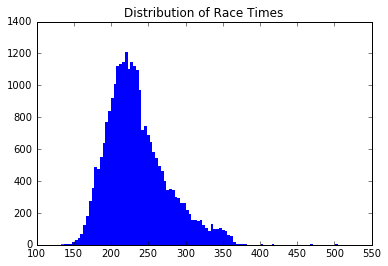

Mean: 3:55:00
Standard Deviation: 0:41:02


In [7]:
plt.title('Distribution of Race Times')
plt.hist(df16['offltime'], bins=100, linewidth=0)
plt.show()
print 'Mean:', marathonlib.time_to_timestring(df16['offltime'].mean())
print 'Standard Deviation:', marathonlib.time_to_timestring(df16['offltime'].var()**0.5)

Train R^2: 0.0
Test R^2: 0.0
Standard Error of Test: 0:41:02


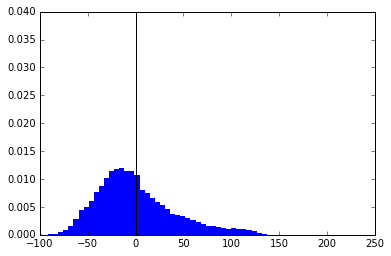

In [8]:
feature_columns = [u'bib', u'age', u'gender', u'elite', u'qualifier', u'home']
model_df = pd.get_dummies(df16[feature_columns])
X = model_df.values
y = df16['offltime'].values

model = DummyRegressor()
model.fit(X, y)
plot_model_deviation(model, X, y, X, y)

plt.show()

# Analyze 2016 data

In [9]:
df16quals = df[(df['year'] == 2016) & (df['qualifier'])]
print len(df16quals)

20951


Train R^2: 0.0
Test R^2: 0.0
Standard Error of Test: 0:41:02


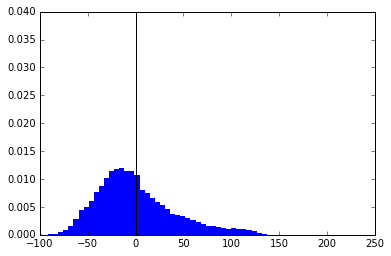

In [11]:
feature_columns = [u'bib', u'age', u'gender', u'elite', u'qualifier', u'home']
model_df = pd.get_dummies(df16[feature_columns])
X = model_df.values
y = df16['offltime'].values

model = DummyRegressor()
model.fit(X, y)
plot_model_deviation(model, X, y, X, y)
plt.savefig('model-mean.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

# Bib Number as Priors
### Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression, Lasso

In [13]:
df16.columns

Index([u'marathon', u'year', u'firstname', u'bib', u'age', u'gender',
       u'offltime', u'starttime', u'time5k', u'time10k', u'time15k',
       u'time20k', u'timehalf', u'time25k', u'time30k', u'time35k', u'time40k',
       u'elite', u'qualifier', u'home', u'miss5k', u'miss10k', u'miss15k',
       u'miss20k', u'misshalf', u'miss25k', u'miss30k', u'miss35k', u'miss40k',
       u'avgtemp', u'avghumid', u'avgwind', u'avgwindE', u'avgwindN',
       u'isgusty', u'rainhours'],
      dtype='object')

In [14]:
feature_columns = [u'bib', u'age', u'gender', u'elite', u'qualifier', u'home']
model_df = pd.get_dummies(df16[feature_columns])
X = model_df.values
y = df16['offltime'].values

Train R^2: 0.616671731497
Test R^2: 0.616671731497
Standard Error of Test: 0:25:24


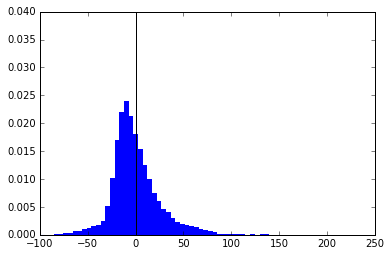

In [16]:
model = LinearRegression()
model.fit(X,y)
plot_model_deviation(model, X, y, X, y)
plt.savefig('model-regression.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

### Lasso Regression Model

Lasso Coefficients (alpha= 0.21 )
------------------
intercept 192.251487775
bib       0.00256888943947
age       0.410238171302
gender    -2.138611985
qualifier -19.6878373658
home_MA   2.60809334171

Train R^2: 0.609313600114
Test R^2: 0.609313600114
Standard Error of Test: 0:25:39


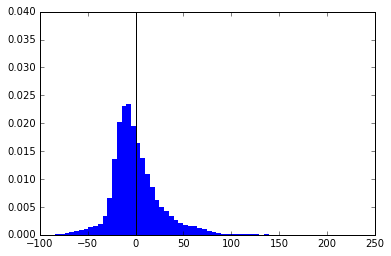

In [17]:
alpha=0.21
model = Lasso(alpha=alpha)
model.fit(X,y)
print 'Lasso Coefficients (alpha=',alpha,')'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(model_df.columns, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)
print 
plot_model_deviation(model, X, y, X, y)
plt.show()

### Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

/Users/timothychan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/timothychan/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
print X_train.shape, y_train.shape

(19827, 74) (19827,)


In [32]:
model = GridSearchCV(RandomForestRegressor(),
                     param_grid = {'n_estimators': [100, 200],
                                   'max_depth': [9],
                                   'max_features': [36, 38, 40, 42]},
                     n_jobs=-1)
model.fit(X_train, y_train)
model.best_params_

{'max_depth': 9, 'max_features': 38, 'n_estimators': 200}

Train R^2: 0.682946186983
Test R^2: 0.622004324879
Standard Error of Test: 0:25:41


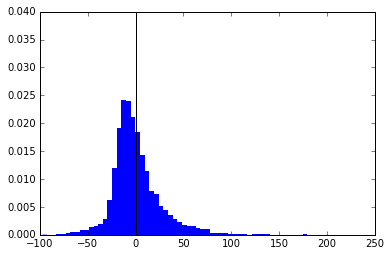

In [20]:
model = RandomForestRegressor(max_depth = 9, max_features = 38, n_estimators = 200)
model.fit(X_train, y_train)
plot_model_deviation(model, X_train, y_train, X_test, y_test)
plt.savefig('model-randomforest.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

### Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
model = GridSearchCV(GradientBoostingRegressor(),
                     param_grid = {'n_estimators': [100, 200],
                                   'learning_rate': [0.08, 0.06, 0.04, 0.03],
                                   'subsample': [0.55, 0.60, 0.65],
                                   'max_depth': [3,4,5,6,7]},
                     n_jobs=-1)
model.fit(X_train, y_train)
model.best_params_

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.6}

Train R^2: 0.666681316146
Test R^2: 0.621659763946
Standard Error of Test: 0:25:42


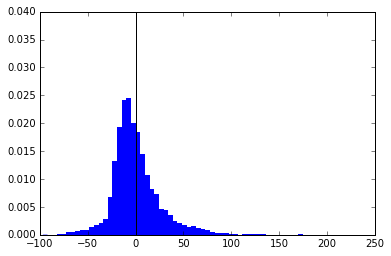

In [22]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.04, max_depth=4, subsample=0.6)
model.fit(X_train, y_train)
plot_model_deviation(model, X_train, y_train, X_test, y_test)
plt.savefig('model-gradientboosting.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

# Using prior Boston Marathon Running History
### All Runners

In [23]:
df_prior = pd.read_csv('data/boston2016_BOSpriors.csv')

In [24]:
print df_prior.shape
df_prior.columns

(18402, 26)


Index([u'marathon', u'year', u'bib', u'name', u'firstname', u'lastname',
       u'age', u'gender', u'city', u'state', u'country', u'citizenship',
       u'offltime', u'prior_marathon', u'prior_year', u'prior_time', u'elite',
       u'qualifier', u'home', u'avgtemp', u'avghumid', u'avgwind', u'avgwindE',
       u'avgwindN', u'isgusty', u'rainhours'],
      dtype='object')

In [25]:
print '2016:',marathonlib.time_to_timestring(df_prior['offltime'].mean())
print '2015:',marathonlib.time_to_timestring(df_prior.loc[df_prior['prior_year']==2015, 'prior_time'].mean())
print '2014:',marathonlib.time_to_timestring(df_prior.loc[df_prior['prior_year']==2014, 'prior_time'].mean())
print '2013:',marathonlib.time_to_timestring(df_prior.loc[df_prior['prior_year']==2013, 'prior_time'].mean())

2016: 3:48:10
2015: 3:37:08
2014: 3:46:29
2013: 3:27:34


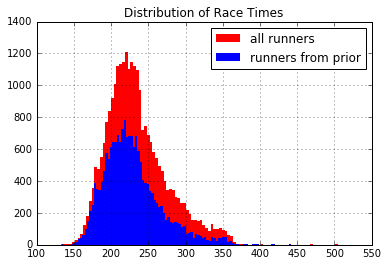

Mean: 3:48:10
Standard Deviation: 0:38:14


In [26]:
### Check that the data is similar
plt.title('Distribution of Race Times')
df16['offltime'].hist(bins=100, color='r', label='all runners', linewidth=0)
df_prior['offltime'].hist(bins=100, label='runners from prior', linewidth=0)
plt.legend()
plt.show()
print 'Mean:', marathonlib.time_to_timestring(df_prior['offltime'].mean())
print 'Standard Deviation:', marathonlib.time_to_timestring(df_prior['offltime'].var()**0.5)

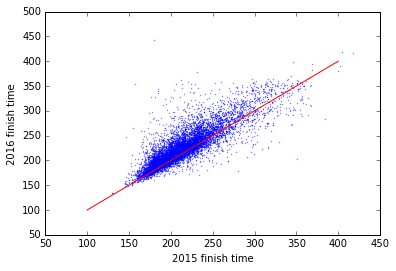

In [27]:
# Correlation between 2015 finish and 2016
plt.scatter(df_prior.loc[df_prior['prior_year']==2015, 'prior_time'], 
            df_prior.loc[df_prior['prior_year']==2015, 'offltime'], alpha=0.5, s=2, linewidth=0)
plt.plot([100, 400], [100, 400], c='r')
plt.xlabel('2015 finish time')
plt.ylabel('2016 finish time')
plt.show()

In [28]:
feature_columns = ['marathon', u'year', u'bib', u'age', u'gender',
       u'elite', u'qualifier', u'home', u'avgtemp',
       u'avghumid', u'avgwind', u'avgwindE', u'avgwindN', u'isgusty',
       u'rainhours','prior_year', 'prior_time', 'prior_marathon']
model_df = pd.get_dummies(df_prior[feature_columns])
X = model_df.values
y = df_prior['offltime'].values
print X.shape

(18402, 77)


### Regression with Priors

Train R^2: 0.711360832691
Test R^2: 0.711360832691
Standard Error of Test: 0:20:32


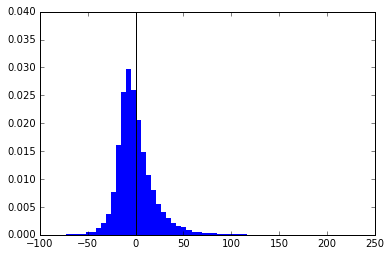

In [29]:
model = LinearRegression()
model.fit(X,y)
plot_model_deviation(model, X, y, X, y)
plt.savefig('priormodel-regression.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()


Lasso Coefficients (alpha= 1.0 )
------------------
intercept 80.3670545004
bib       0.00133159207557
age       0.190881152964
avgtemp   -0.125107125417
avghumid  0.0184700661651
prior_time0.570976194936

Train R^2: 0.704984958233
Test R^2: 0.704984958233
Standard Error of Test: 0:20:46


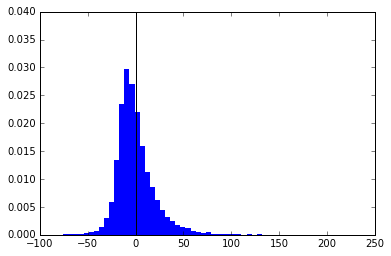

In [30]:
alpha=1.0
model = Lasso(alpha=alpha)
model.fit(X,y)
print 
print 'Lasso Coefficients (alpha=',alpha,')'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(model_df.columns, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)
print
plot_model_deviation(model, X, y, X, y)

plt.show()


#### Pretty good!  Prior is better than bib #

### Try Random Forest

(13801, 77) (13801,)
Train R^2: 0.897082580072
Test R^2: 0.721757888315
Standard Error of Test: 0:19:59


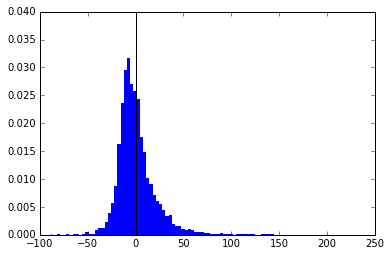

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print X_train.shape, y_train.shape
model = RandomForestRegressor(max_depth = 16, max_features = 24, n_estimators = 500)
model.fit(X_train, y_train)
plot_model_deviation(model, X_train, y_train, X_test, y_test)
plt.savefig('priormodel-randomforest.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

In [52]:
model = GridSearchCV(RandomForestRegressor(),
                     param_grid = {'n_estimators': [100],
                                   'max_depth': [14, 16, 18],
                                   'max_features': [37, 40, 43]},
                     n_jobs=-1)
model.fit(X_train, y_train)
model.best_params_

{'max_depth': 16, 'max_features': 43, 'n_estimators': 100}

Train R^2: 0.912119553829
Test R^2: 0.727362041855
Standard Error of Test: 0:19:47


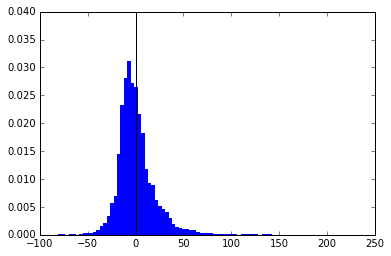

In [33]:
model = RandomForestRegressor(max_depth = 16, max_features = 43, n_estimators = 500)
model.fit(X_train, y_train)
plot_model_deviation(model, X_train, y_train, X_test, y_test)
plt.savefig('priormodel-randomforest.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()